In [24]:
import pandas as pd
import pycountry_convert as pc
import matplotlib.pyplot as plt
import numpy as np
from pycountry import countries

## Model
suicide ~ population \
suicide ~ population + gdp_per_capita \
group by country (or year) (or age) suicide ~ population + gdp_per_capita

In [11]:
suicide_df = pd.read_csv('data/suicide.csv')
suicide_df = suicide_df.rename(columns={'suicides_no':'suicide', ' gdp_for_year ($) ':'total_gdp', 'gdp_per_capita ($)':'gdp_per_capita', 'HDI for year':'hdi'})
suicide_df = suicide_df.drop(columns=['suicides/100k pop', 'hdi', 'country-year', 'gdp_per_capita', 'generation'])
suicide_df['total_gdp'] = suicide_df['total_gdp'].apply(lambda x: int(x.replace(',', '')))
suicide_df      

,country,year,sex,age,suicide,population,total_gdp
0,Albania,1987,male,15-24 years,21,312900,2156624900
1,Albania,1987,male,35-54 years,16,308000,2156624900
2,Albania,1987,female,15-24 years,14,289700,2156624900
3,Albania,1987,male,75+ years,1,21800,2156624900
4,Albania,1987,male,25-34 years,9,274300,2156624900
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,63067077179
27816,Uzbekistan,2014,female,75+ years,9,348465,63067077179
27817,Uzbekistan,2014,male,5-14 years,60,2762158,63067077179
27818,Uzbekistan,2014,female,5-14 years,44,2631600,63067077179


## Get the rows belong to European countries

In [12]:
# Get the country names since some countries are not recognized by pycountry
countries_name_list = [country.name for country in list(countries)]

# Function to extract continent code
def get_continent(country):
    country_code = pc.country_name_to_country_alpha2(country)
    return pc.country_alpha2_to_continent_code(country_code)

suicide_df = suicide_df[suicide_df['country'].isin(countries_name_list)]   # Filter out invalid countries
suicide_df['continent'] = suicide_df['country'].apply(get_continent)       # Extract continent code
suicide_df = suicide_df[suicide_df['continent'] == 'EU']                   # Get the countries in EU
suicide_df.head(5)

C:\Users\dng09\AppData\Local\Temp\ipykernel_19272\1392511374.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suicide_df['continent'] = suicide_df['country'].apply(get_continent)       # Extract continent code


,country,year,sex,age,suicide,population,total_gdp,continent
0,Albania,1987,male,15-24 years,21,312900,2156624900,EU
1,Albania,1987,male,35-54 years,16,308000,2156624900,EU
2,Albania,1987,female,15-24 years,14,289700,2156624900,EU
3,Albania,1987,male,75+ years,1,21800,2156624900,EU
4,Albania,1987,male,25-34 years,9,274300,2156624900,EU


## Group data by year and country

In [59]:
suicide_df_grouped = suicide_df.groupby(['year', 'country']).aggregate('sum')
df = suicide_df_grouped.unstack().reset_index()
df = df[(1991 <= df['year']) & (df['year'] <= 2010)].dropna(axis=1).set_index('year').stack()
df


population  suicide     total_gdp
year country                                               
1991 Austria               7299728.0   1769.0  2.085530e+12
     Belgium               9396600.0   1805.0  2.539654e+12
     Bulgaria              8431900.0   1384.0  1.313226e+11
     Finland               4698500.0   1493.0  1.534398e+12
     France               53282900.0  11502.0  1.523132e+13
...                              ...      ...           ...
2010 Russian Federation  134865987.0  33356.0  1.829899e+13
     Spain                43595356.0   3158.0  1.717940e+13
     Sweden                8823125.0   1141.0  5.860532e+12
     Ukraine              43296809.0   9089.0  1.632158e+12
     United Kingdom       58403529.0   4188.0  2.929408e+13

[420 rows x 3 columns]

## Generate new columns

-   The dataframe is tranposed and stacked so that it have a better form
-   Columns `suicides_per_100k` and `gdp_per_capita` are generated using these data
-   The dataframe is exported to a csv file for future processes

In [60]:
output_df = df.copy()
output_df['suicides_per_100k'] = (output_df['suicide']/output_df['population']) * 100000
output_df['gdp_per_capita'] = output_df['total_gdp']/output_df['population']
# output_df.to_csv('data/suicide_cleaned.csv')
output_df

population  suicide     total_gdp  \
year country                                                  
1991 Austria               7299728.0   1769.0  2.085530e+12   
     Belgium               9396600.0   1805.0  2.539654e+12   
     Bulgaria              8431900.0   1384.0  1.313226e+11   
     Finland               4698500.0   1493.0  1.534398e+12   
     France               53282900.0  11502.0  1.523132e+13   
...                              ...      ...           ...   
2010 Russian Federation  134865987.0  33356.0  1.829899e+13   
     Spain                43595356.0   3158.0  1.717940e+13   
     Sweden                8823125.0   1141.0  5.860532e+12   
     Ukraine              43296809.0   9089.0  1.632158e+12   
     United Kingdom       58403529.0   4188.0  2.929408e+13   

                         suicides_per_100k  gdp_per_capita  
year country                                                
1991 Austria                     24.233780   285699.704523  
     Belgium                     19.209076   270273.694578  
     Bulgaria                    16.413857    15574.494556  
     Finland                     31.776099   326571.859671  
     France                      21.586663   285857.600456  
...                                    ...             ...  
2010 Russian Federation          24.732700   135682.789649  
     Spain                        7.243891   394064.931955  
     Sweden                      12.931926   664224.101413  
     Ukraine                     20.992309    37696.955239  
     United Kingdom               7.170800   501580.661962  

[420 rows x 5 columns]

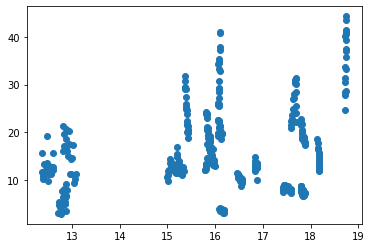

In [64]:
plt.scatter(np.log(output_df['population']), output_df['suicides_per_100k'])